In [1]:
import pandas as pd
import numpy as np
import ast
pd.set_option('display.max_columns', None)

**Чтение данных**

С начала сделаем так, чтобы данные можно было прочитать

In [2]:
def customParser(data):
    d1 = eval(data)
    if len(d1) == 0:
        d1 = float("nan")
    return d1

In [3]:
credits = pd.read_csv('the-movies-dataset/credits.csv', converters={'cast':customParser, 'crew':customParser})
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [4]:
credits['cast'][1][2]['name'], credits['cast'][0][0]['name']

('Kirsten Dunst', 'Tom Hanks')

In [5]:
movieInfo = pd.read_csv('the-movies-dataset/movies_metadata.csv', converters={'production_companies':customParser, 'production_countries':customParser, 'genres':customParser, 'spoken_languages':customParser})

In [6]:
movieInfo['production_companies'][2][0]['name']

'Warner Bros.'

In [7]:
movieInfo['belongs_to_collection'] = movieInfo['belongs_to_collection'].apply(lambda x: eval(x) if x == x else x)

In [8]:
movieInfo['belongs_to_collection'][0]['name']

'Toy Story Collection'

In [9]:
keywords = pd.read_csv('the-movies-dataset/keywords.csv', converters={'keywords':customParser})
keywords.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

**Объединяем данные**

In [10]:
bigInfo = pd.merge(credits, movieInfo, on='id')
bigInfo.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  False   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  False   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  False   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  False   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  False   

                               belongs_to_collection    budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                NaN  65000000   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3                                                NaN  16000000   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  tt0114709                en   
1                                   NaN  tt0113497                en   
2                                   NaN  tt0113228                en   
3                                   NaN  tt0114885                en   
4                                   NaN  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

   runtime                                   spoken_languages    status  \
0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2    101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

     

In [11]:
megaInfo = pd.merge(bigInfo, keywords, on='id')
megaInfo.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  False   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  False   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  False   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  False   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  False   

                               belongs_to_collection    budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                NaN  65000000   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3                                                NaN  16000000   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  tt0114709                en   
1                                   NaN  tt0113497                en   
2                                   NaN  tt0113228                en   
3                                   NaN  tt0114885                en   
4                                   NaN  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

   runtime                                   spoken_languages    status  \
0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2    101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

     

In [12]:
megaInfo.shape

(46628, 27)

**Преобразование данных**

Теперь я удалю из списка все, что мне 100% не пригодится. Преобразую некоторые категориальные переменные, которые уже есть, в нормальный вид. Добавлю еще парочку переменных (число актеров, число жанров, размер съёмачной группы). Посмотрю на получившиеся данные и выберу целевую переменную

In [13]:
megaInfo = megaInfo.drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 
                          'video', 'original_language'], axis=1)

In [14]:
megaInfo['adult'] = megaInfo['adult'].map({False:0, True:1})

In [15]:
megaInfo['cast_count'] = megaInfo.cast.apply(lambda x: len(x) if x == x else x)

In [16]:
megaInfo['genres_count'] = megaInfo.genres.apply(lambda x: len(x) if x == x else x)

In [17]:
megaInfo['crew_count'] = megaInfo.crew.apply(lambda x: len(x) if x == x else x)

In [18]:
megaInfo['keywords_count'] = megaInfo.keywords.apply(lambda x: len(x) if x == x else x)

In [19]:
megaInfo['production_companies_count'] = megaInfo.production_companies.apply(lambda x: len(x) if x == x else x)

In [20]:
megaInfo['production_countries_count'] = megaInfo.production_countries.apply(lambda x: len(x) if x == x else x)

In [21]:
megaInfo['spoken_languages_count'] = megaInfo.spoken_languages.apply(lambda x: len(x) if x == x else x)

In [22]:
megaInfo['profit'] = megaInfo['revenue'].sub(megaInfo['budget'], axis = 0) 

In [23]:
megaInfo.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult    budget  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862      0  30000000   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844      0  65000000   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602      0         0   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357      0  16000000   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862      0         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

   runtime                                   spoken_languages  \
0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2    101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3    127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4    106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  vote_average  vote_count  \
0                    Toy Story           7.7        5415   
1                      Jumanji           6.9        2413   
2             Grumpier Old Men           6.5          92   
3            Waiting to Exhale           6.1          34   
4  Father of the Bride Part II           5.7         173   

                                            keywords  cast_count  \
0  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...        13.0   
1  [{'id': 10090, 'name': 'board game'}, {'id': 1...        26.0   
2  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...         7.0   
3  [{'id': 818, 'name': 'based on novel'}, {'id':...        10.0   
4  [{'id': 1009, 'name': 'baby'}

 В некоторых полях вместо пропуска стоят 0, я верну пропуски на место, чтобы оценить число заполненных строк. Потом, при необходимости, вместо nan внесу некоторое значение или удалю эти поля нафиг.

In [24]:
megaInfo['budget'] = megaInfo.budget.apply(lambda x: float('nan') if x == 0 else x)

In [25]:
megaInfo['revenue'] = megaInfo.revenue.apply(lambda x: float('nan') if x == 0 else x)

In [26]:
megaInfo['vote_count'] = megaInfo.vote_count.apply(lambda x: float('nan') if x == 0 else x)

In [27]:
megaInfo['vote_average'] = megaInfo.vote_average.apply(lambda x: float('nan') if x == 0 else x)

In [28]:
megaInfo['runtime'] = megaInfo.runtime.apply(lambda x: float('nan') if float(x) == 0 else x)

In [29]:
megaInfo['popularity'] = megaInfo.popularity.apply(lambda x: float('nan') if float(x) == 0 else x)

In [30]:
megaInfo['profit'] = megaInfo.profit.apply(lambda x: float('nan') if x == 0 else x)

Теперь можно посмотреть на данные

In [32]:
megaInfo.describe()

id         adult        budget    popularity       revenue  \
count   46628.000000  46628.000000  9.053000e+03  46561.000000  7.537000e+03   
mean   109678.820837      0.000193  2.144505e+07      2.898465  6.821719e+07   
std    112908.126984      0.013892  3.415291e+07      5.953511  1.458936e+08   
min         2.000000      0.000000  1.000000e+00      0.000001  1.000000e+00   
25%     26760.250000      0.000000  2.000000e+06      0.385288  2.300000e+06   
50%     61299.000000      0.000000  8.000000e+06      1.118792  1.662719e+07   
75%    159624.000000      0.000000  2.500000e+07      3.620977  6.613263e+07   
max    469172.000000      1.000000  3.800000e+08    547.488298  2.787965e+09   

            runtime  vote_average    vote_count    cast_count  genres_count  \
count  44737.000000  43507.000000  43607.000000  44137.000000  44104.000000   
mean      97.507745      6.014269    115.654872     13.008678      2.116407   
std       34.622673      1.256850    502.113927     11.981503      1.055651   
min        1.000000      0.500000      1.000000      1.000000      1.000000   
25%       86.000000      5.300000      4.000000      6.000000      1.000000   
50%       95.000000      6.100000     11.000000     10.000000      2.000000   
75%      107.000000      6.800000     38.000000     15.000000      3.000000   
max     1256.000000     10.000000  14075.000000    313.000000      8.000000   

         crew_count  keywords_count  production_companies_count  \
count  45830.000000    31739.000000                34350.000000   
mean      10.328868        5.023504                    2.105211   
std       15.792203        4.898987                    1.730948   
min        1.000000        1.000000                    1.000000   
25%        2.000000        2.000000                    1.000000   
50%        6.000000        4.000000                    2.000000   
75%       12.000000        6.000000                    3.000000   
max      435.000000      149.000000                   26.000000   

       production_countries_count  spoken_languages_count        profit  
count                40136.000000            42671.000000  1.111200e+04  
mean                     1.264276                1.278433  2.879868e+07  
std                      0.686807                0.691489  1.029185e+08  
min                      1.000000                1.000000 -1.657101e+08  
25%                      1.000000                1.000000 -3.000000e+06  
50%                      1.000000                1.000000  3.948100e+04  
75%                      1.000000                1.000000  1.803927e+07  
max                     25.000000               19.000000  2.550965e+09

Я хотела сначала предсказывать выручку, по входящим данным, но выходит, что не получится тк инфа о выручке есть только в 7537 данных. С бюджетом тоже надо будет что-то придумать, тк инфа о нем тоже мало где имеется. Пропуски есть почти везде, но это не так критично, как 2 переменные, которые я выше описала. Тут их можно будет удалить.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130b460d0>,
      dtype=object)

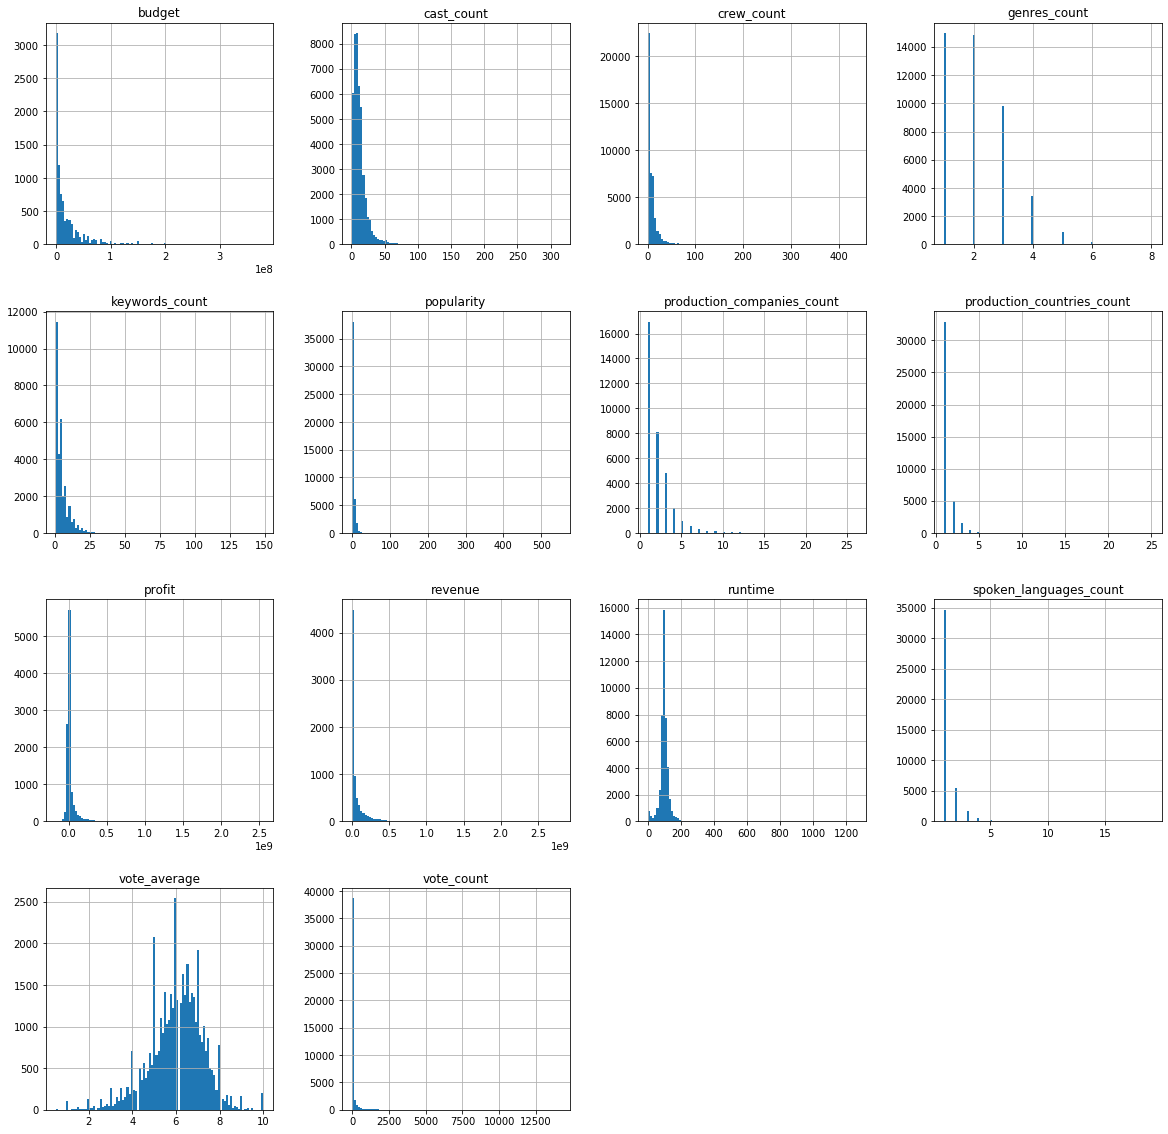

In [33]:
megaInfo[
    ['budget', 'revenue', 'runtime', 'vote_average', 'popularity', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'keywords_count', 'production_countries_count',
    'spoken_languages_count', 'profit']
].hist(figsize=(20,20), bins=100)

Фильмов для взрослых почти нет, возможно эту переменную можно будет убрать вообще. Актерский состав (cast_count) в основном включает от 0 до 75 человек. Число людей на съёмочной (crew_count) площадке в среднем от 0 до 50 человек. Жанров всего 9 и в основном у фильма 1 или 2 жанра. Среднее число ключевых слов (keyword_count) 0 - 25. Число компаний производителей (production_companies_count) 1 - 12. У фильмов в основном 1 - 5 стран производителей. Средняя продолжительность фильмов примерно 100 минут. 

Созраним dataset

In [34]:
megaInfo.to_csv('movieMegaInfo.csv', sep=';')

**Выделим категориальные признаки из стран, жанров**

In [32]:
def execUniquenames (fullInfo):
    uniqueList = []
    print(len(fullInfo))
    for i in range(len(fullInfo)):
        print(i)
        if fullInfo[i] == fullInfo[i]:
            for j in range (len(fullInfo[i])):
                if fullInfo[i][j]['name'] not in uniqueList:
                    uniqueList.append(fullInfo[i][j]['name'])
    return uniqueList

In [33]:
geners = execUniquenames(megaInfo['genres'])
geners

46628
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865


5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483


7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981


9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746


11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
1149

13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
1336

15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15281
15282
15283
15284
15285
15286
15287
15288
15289
15290
15291
15292
15293
15294
15295
15296
15297
15298
15299
15300
15301
15302
15303
15304
15305
15306
15307
1530

17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
1744

19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
19289
19290
19291
19292
19293
19294
19295
19296
19297
19298
19299
19300
19301
19302
19303
19304
19305
19306
19307
19308
19309
19310
19311
19312
19313
19314
19315
19316
19317
19318
19319
19320
19321
19322
19323
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19334
19335
19336
19337
19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
19354
19355
19356
19357
19358
19359
19360
19361
19362
19363
19364
19365
19366
19367
19368
19369
19370
19371
19372
19373
19374
19375
19376
19377
19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
1944

21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
2144

23274
23275
23276
23277
23278
23279
23280
23281
23282
23283
23284
23285
23286
23287
23288
23289
23290
23291
23292
23293
23294
23295
23296
23297
23298
23299
23300
23301
23302
23303
23304
23305
23306
23307
23308
23309
23310
23311
23312
23313
23314
23315
23316
23317
23318
23319
23320
23321
23322
23323
23324
23325
23326
23327
23328
23329
23330
23331
23332
23333
23334
23335
23336
23337
23338
23339
23340
23341
23342
23343
23344
23345
23346
23347
23348
23349
23350
23351
23352
23353
23354
23355
23356
23357
23358
23359
23360
23361
23362
23363
23364
23365
23366
23367
23368
23369
23370
23371
23372
23373
23374
23375
23376
23377
23378
23379
23380
23381
23382
23383
23384
23385
23386
23387
23388
23389
23390
23391
23392
23393
23394
23395
23396
23397
23398
23399
23400
23401
23402
23403
23404
23405
23406
23407
23408
23409
23410
23411
23412
23413
23414
23415
23416
23417
23418
23419
23420
23421
23422
23423
23424
23425
23426
23427
23428
23429
23430
23431
23432
23433
23434
23435
23436
23437
23438
23439
2344

25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
2543

27289
27290
27291
27292
27293
27294
27295
27296
27297
27298
27299
27300
27301
27302
27303
27304
27305
27306
27307
27308
27309
27310
27311
27312
27313
27314
27315
27316
27317
27318
27319
27320
27321
27322
27323
27324
27325
27326
27327
27328
27329
27330
27331
27332
27333
27334
27335
27336
27337
27338
27339
27340
27341
27342
27343
27344
27345
27346
27347
27348
27349
27350
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27362
27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
27409
27410
27411
27412
27413
27414
27415
27416
27417
27418
27419
27420
27421
27422
27423
27424
27425
27426
27427
27428
27429
27430
27431
27432
27433
27434
27435
27436
27437
27438
27439
27440
27441
27442
27443
27444
27445
27446
27447
27448
27449
27450
27451
27452
27453
27454
2745

29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
2949

31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31452
31453
31454
31455
31456
31457
31458
31459
31460
31461
31462
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581
31582
31583
31584
31585
31586
31587
31588
31589
31590
31591
31592
31593
31594
31595
31596
3159

33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
33588
33589
33590
33591
33592
33593
33594
33595
33596
33597
33598
33599
33600
33601
33602
33603
33604
33605
33606
33607
33608
33609
33610
33611
33612
33613
33614
33615
3361

35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
35468
35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
35485
35486
35487
35488
35489
35490
35491
35492
35493
35494
35495
35496
35497
35498
35499
35500
35501
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35524
35525
35526
35527
35528
35529
35530
35531
35532
35533
35534
35535
35536
35537
35538
35539
35540
35541
35542
35543
35544
35545
35546
35547
35548
35549
35550
35551
35552
35553
35554
35555
35556
35557
35558
35559
35560
35561
35562
35563
35564
35565
35566
35567
35568
35569
35570
35571
35572
35573
35574
35575
35576
35577
35578
35579
35580
35581
35582
35583
35584
35585
35586
35587
35588
35589
35590
35591
3559

37767
37768
37769
37770
37771
37772
37773
37774
37775
37776
37777
37778
37779
37780
37781
37782
37783
37784
37785
37786
37787
37788
37789
37790
37791
37792
37793
37794
37795
37796
37797
37798
37799
37800
37801
37802
37803
37804
37805
37806
37807
37808
37809
37810
37811
37812
37813
37814
37815
37816
37817
37818
37819
37820
37821
37822
37823
37824
37825
37826
37827
37828
37829
37830
37831
37832
37833
37834
37835
37836
37837
37838
37839
37840
37841
37842
37843
37844
37845
37846
37847
37848
37849
37850
37851
37852
37853
37854
37855
37856
37857
37858
37859
37860
37861
37862
37863
37864
37865
37866
37867
37868
37869
37870
37871
37872
37873
37874
37875
37876
37877
37878
37879
37880
37881
37882
37883
37884
37885
37886
37887
37888
37889
37890
37891
37892
37893
37894
37895
37896
37897
37898
37899
37900
37901
37902
37903
37904
37905
37906
37907
37908
37909
37910
37911
37912
37913
37914
37915
37916
37917
37918
37919
37920
37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
3793

39766
39767
39768
39769
39770
39771
39772
39773
39774
39775
39776
39777
39778
39779
39780
39781
39782
39783
39784
39785
39786
39787
39788
39789
39790
39791
39792
39793
39794
39795
39796
39797
39798
39799
39800
39801
39802
39803
39804
39805
39806
39807
39808
39809
39810
39811
39812
39813
39814
39815
39816
39817
39818
39819
39820
39821
39822
39823
39824
39825
39826
39827
39828
39829
39830
39831
39832
39833
39834
39835
39836
39837
39838
39839
39840
39841
39842
39843
39844
39845
39846
39847
39848
39849
39850
39851
39852
39853
39854
39855
39856
39857
39858
39859
39860
39861
39862
39863
39864
39865
39866
39867
39868
39869
39870
39871
39872
39873
39874
39875
39876
39877
39878
39879
39880
39881
39882
39883
39884
39885
39886
39887
39888
39889
39890
39891
39892
39893
39894
39895
39896
39897
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
3993

41795
41796
41797
41798
41799
41800
41801
41802
41803
41804
41805
41806
41807
41808
41809
41810
41811
41812
41813
41814
41815
41816
41817
41818
41819
41820
41821
41822
41823
41824
41825
41826
41827
41828
41829
41830
41831
41832
41833
41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41861
41862
41863
41864
41865
41866
41867
41868
41869
41870
41871
41872
41873
41874
41875
41876
41877
41878
41879
41880
41881
41882
41883
41884
41885
41886
41887
41888
41889
41890
41891
41892
41893
41894
41895
41896
41897
41898
41899
41900
41901
41902
41903
41904
41905
41906
41907
41908
41909
41910
41911
41912
41913
41914
41915
41916
41917
41918
41919
41920
41921
41922
41923
41924
41925
41926
41927
41928
41929
41930
41931
41932
41933
41934
41935
41936
41937
41938
41939
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
4196

43764
43765
43766
43767
43768
43769
43770
43771
43772
43773
43774
43775
43776
43777
43778
43779
43780
43781
43782
43783
43784
43785
43786
43787
43788
43789
43790
43791
43792
43793
43794
43795
43796
43797
43798
43799
43800
43801
43802
43803
43804
43805
43806
43807
43808
43809
43810
43811
43812
43813
43814
43815
43816
43817
43818
43819
43820
43821
43822
43823
43824
43825
43826
43827
43828
43829
43830
43831
43832
43833
43834
43835
43836
43837
43838
43839
43840
43841
43842
43843
43844
43845
43846
43847
43848
43849
43850
43851
43852
43853
43854
43855
43856
43857
43858
43859
43860
43861
43862
43863
43864
43865
43866
43867
43868
43869
43870
43871
43872
43873
43874
43875
43876
43877
43878
43879
43880
43881
43882
43883
43884
43885
43886
43887
43888
43889
43890
43891
43892
43893
43894
43895
43896
43897
43898
43899
43900
43901
43902
43903
43904
43905
43906
43907
43908
43909
43910
43911
43912
43913
43914
43915
43916
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
4393

45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
45919
45920
45921
45922
45923
45924
45925
45926
45927
45928
4592

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie']

In [34]:
def hasUniqueValue(data, name):
    for i in range(len(data)):
        if data[i]['name'] == name:
            return 1
    return 0

In [35]:
for i in range(len(geners)):
    megaInfo['gener '+ geners[i]] = megaInfo['genres'].apply(lambda x: hasUniqueValue(x, geners[i]) if x == x else 0)

In [36]:
countries = execUniquenames(megaInfo['production_countries'])
countries, len(countries)

46628
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313


4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312


6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379


8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310


10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
1035

12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12446
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
12469
12470
12471
12472
12473
12474
12475
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
1249

14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
1468

16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
1661

18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
1867

20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
2077

22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
22645
22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22702
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
2277

24719
24720
24721
24722
24723
24724
24725
24726
24727
24728
24729
24730
24731
24732
24733
24734
24735
24736
24737
24738
24739
24740
24741
24742
24743
24744
24745
24746
24747
24748
24749
24750
24751
24752
24753
24754
24755
24756
24757
24758
24759
24760
24761
24762
24763
24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24810
24811
24812
24813
24814
24815
24816
24817
24818
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24841
24842
24843
24844
24845
24846
24847
24848
24849
24850
24851
24852
24853
24854
24855
24856
24857
24858
24859
24860
24861
24862
24863
24864
24865
24866
24867
24868
24869
24870
24871
24872
24873
24874
24875
24876
24877
24878
24879
24880
24881
24882
24883
24884
2488

26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
26750
26751
26752
26753
26754
26755
26756
26757
26758
26759
26760
26761
26762
26763
26764
26765
26766
26767
2676

28601
28602
28603
28604
28605
28606
28607
28608
28609
28610
28611
28612
28613
28614
28615
28616
28617
28618
28619
28620
28621
28622
28623
28624
28625
28626
28627
28628
28629
28630
28631
28632
28633
28634
28635
28636
28637
28638
28639
28640
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
28717
28718
28719
28720
28721
28722
28723
28724
28725
28726
28727
28728
28729
28730
28731
28732
28733
28734
28735
28736
28737
28738
28739
28740
28741
28742
28743
28744
28745
28746
28747
28748
28749
28750
28751
28752
28753
28754
28755
28756
28757
28758
28759
28760
28761
28762
28763
28764
28765
28766
2876

30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
3106

33099
33100
33101
33102
33103
33104
33105
33106
33107
33108
33109
33110
33111
33112
33113
33114
33115
33116
33117
33118
33119
33120
33121
33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
33132
33133
33134
33135
33136
33137
33138
33139
33140
33141
33142
33143
33144
33145
33146
33147
33148
33149
33150
33151
33152
33153
33154
33155
33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
33172
33173
33174
33175
33176
33177
33178
33179
33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
3326

35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
35375
35376
35377
35378
35379
35380
35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
35468
35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
35485
35486
35487
35488
35489
35490
35491
35492
35493
35494
35495
35496
35497
35498
35499
35500
35501
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35524
3552

37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
37739
37740
37741
37742
37743
37744
37745
37746
37747
37748
37749
37750
37751
37752
37753
37754
37755
37756
37757
37758
37759
37760
37761
37762
37763
37764
37765
37766
37767
37768
37769
37770
37771
37772
37773
37774
37775
37776
37777
37778
37779
37780
37781
37782
37783
37784
37785
37786
37787
37788
37789
37790
37791
37792
37793
37794
37795
37796
37797
37798
37799
37800
37801
3780

39882
39883
39884
39885
39886
39887
39888
39889
39890
39891
39892
39893
39894
39895
39896
39897
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
39932
39933
39934
39935
39936
39937
39938
39939
39940
39941
39942
39943
39944
39945
39946
39947
39948
39949
39950
39951
39952
39953
39954
39955
39956
39957
39958
39959
39960
39961
39962
39963
39964
39965
39966
39967
39968
39969
39970
39971
39972
39973
39974
39975
39976
39977
39978
39979
39980
39981
39982
39983
39984
39985
39986
39987
39988
39989
39990
39991
39992
39993
39994
39995
39996
39997
39998
39999
40000
40001
40002
40003
40004
40005
40006
40007
40008
40009
40010
40011
40012
40013
40014
40015
40016
40017
40018
40019
40020
40021
40022
40023
40024
40025
40026
40027
40028
40029
40030
40031
40032
40033
40034
40035
40036
40037
40038
40039
40040
40041
40042
40043
40044
40045
40046
40047
4004

42095
42096
42097
42098
42099
42100
42101
42102
42103
42104
42105
42106
42107
42108
42109
42110
42111
42112
42113
42114
42115
42116
42117
42118
42119
42120
42121
42122
42123
42124
42125
42126
42127
42128
42129
42130
42131
42132
42133
42134
42135
42136
42137
42138
42139
42140
42141
42142
42143
42144
42145
42146
42147
42148
42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
42169
42170
42171
42172
42173
42174
42175
42176
42177
42178
42179
42180
42181
42182
42183
42184
42185
42186
42187
42188
42189
42190
42191
42192
42193
42194
42195
42196
42197
42198
42199
42200
42201
42202
42203
42204
42205
42206
42207
42208
42209
42210
42211
42212
42213
42214
42215
42216
42217
42218
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
42241
42242
42243
42244
42245
42246
42247
42248
42249
42250
42251
42252
42253
42254
42255
42256
42257
42258
42259
42260
4226

44094
44095
44096
44097
44098
44099
44100
44101
44102
44103
44104
44105
44106
44107
44108
44109
44110
44111
44112
44113
44114
44115
44116
44117
44118
44119
44120
44121
44122
44123
44124
44125
44126
44127
44128
44129
44130
44131
44132
44133
44134
44135
44136
44137
44138
44139
44140
44141
44142
44143
44144
44145
44146
44147
44148
44149
44150
44151
44152
44153
44154
44155
44156
44157
44158
44159
44160
44161
44162
44163
44164
44165
44166
44167
44168
44169
44170
44171
44172
44173
44174
44175
44176
44177
44178
44179
44180
44181
44182
44183
44184
44185
44186
44187
44188
44189
44190
44191
44192
44193
44194
44195
44196
44197
44198
44199
44200
44201
44202
44203
44204
44205
44206
44207
44208
44209
44210
44211
44212
44213
44214
44215
44216
44217
44218
44219
44220
44221
44222
44223
44224
44225
44226
44227
44228
44229
44230
44231
44232
44233
44234
44235
44236
44237
44238
44239
44240
44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44258
44259
4426

46093
46094
46095
46096
46097
46098
46099
46100
46101
46102
46103
46104
46105
46106
46107
46108
46109
46110
46111
46112
46113
46114
46115
46116
46117
46118
46119
46120
46121
46122
46123
46124
46125
46126
46127
46128
46129
46130
46131
46132
46133
46134
46135
46136
46137
46138
46139
46140
46141
46142
46143
46144
46145
46146
46147
46148
46149
46150
46151
46152
46153
46154
46155
46156
46157
46158
46159
46160
46161
46162
46163
46164
46165
46166
46167
46168
46169
46170
46171
46172
46173
46174
46175
46176
46177
46178
46179
46180
46181
46182
46183
46184
46185
46186
46187
46188
46189
46190
46191
46192
46193
46194
46195
46196
46197
46198
46199
46200
46201
46202
46203
46204
46205
46206
46207
46208
46209
46210
46211
46212
46213
46214
46215
46216
46217
46218
46219
46220
46221
46222
46223
46224
46225
46226
46227
46228
46229
46230
46231
46232
46233
46234
46235
46236
46237
46238
46239
46240
46241
46242
46243
46244
46245
46246
46247
46248
46249
46250
46251
46252
46253
46254
46255
46256
46257
46258
4625

(['United States of America',
  'Germany',
  'United Kingdom',
  'France',
  'Italy',
  'Spain',
  'China',
  'Australia',
  'South Africa',
  'Canada',
  'Switzerland',
  'Belgium',
  'Japan',
  'Iran',
  'Netherlands',
  'Hong Kong',
  'Tunisia',
  'Ireland',
  'Dominican Republic',
  'Croatia',
  'Russia',
  'Macedonia',
  'Austria',
  'Taiwan',
  'New Zealand',
  'Mexico',
  'Poland',
  'Peru',
  'Cuba',
  'Liechtenstein',
  'Denmark',
  'Portugal',
  'Finland',
  'Sweden',
  'Argentina',
  'Iceland',
  'South Korea',
  'Serbia',
  'Hungary',
  'Czech Republic',
  'India',
  'Brazil',
  'Greece',
  'Congo',
  'Senegal',
  'Burkina Faso',
  'Romania',
  'Philippines',
  'Vietnam',
  'Trinidad and Tobago',
  'Bulgaria',
  'Chile',
  'Norway',
  'Kazakhstan',
  'Algeria',
  'Luxembourg',
  'Georgia',
  'Ukraine',
  'Botswana',
  'Aruba',
  'Israel',
  'Turkey',
  'Ecuador',
  'Lebanon',
  'Morocco',
  'Bosnia and Herzegovina',
  'Bahamas',
  'Malaysia',
  'Bhutan',
  'Jamaica',
  'Pak

In [37]:
for i in range(len(countries)):
    megaInfo['country ' + countries[i]] = megaInfo['production_countries'].apply(lambda x: hasUniqueValue(x, countries[i]) if x == x else 0)

Хотела также добавить к списку категорий актеров и компании производители, но получилось очень долго и тяжело для компа, поэтому исключила из списка на рассмотрение

In [88]:
# companies = execUniquenames(megaInfo['production_companies'])
# companies, len(companies)

In [89]:
# for i in range(len(companies)):
#     print(i)
#     megaInfo['company ' + companies[i]] = megaInfo['production_companies'].apply(lambda x: hasUniqueValue(x, companies[i]) if x == x else 0)

In [38]:
# cats = execUniquenames(megaInfo['cast'])
# cats, len(cats)

In [91]:
# spokenLanguages = execUniquenames(megaInfo['spoken_languages'])
# spokenLanguages, len(spokenLanguages)

In [92]:
# for i in range(len(spokenLanguages)):
#     megaInfo['language ' + spokenLanguages[i]] = megaInfo['spoken_languages'].apply(lambda x: hasUniqueValue(x, spokenLanguages[i]) if x == x else 0)

In [93]:
# megaInfo.to_csv('movieMegaInfoWithCategor.csv', sep=';')

In [94]:
# megaInfo[0:10]

**Добавляем инфу о странах**

Это нужно для того чтобы посмотреть на данные в power bi

In [39]:
megaInfo[['id', 'release_date']].loc[2].values.tolist()

[15602, '1995-12-22']

In [60]:
copyMovieInfoWithCountries = pd.DataFrame()
for i in range(len(megaInfo)):
    print(i)
    copy = [megaInfo[['id', 'genres', 'release_date','budget', 'revenue', 'runtime', 'vote_average', 'profit', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'production_countries_count',
    'spoken_languages_count']].loc[i].values.tolist()]
    if megaInfo['production_countries'][i] == megaInfo['production_countries'][i]:
        for j in range(len(megaInfo['production_countries'][i])):
            if j != 0:
                copy[0] = copy[0][:-1]
            copy[0].append(megaInfo['production_countries'][i][j]['name'])
            copyMovieInfoWithCountries = copyMovieInfoWithCountries.append(copy)
    else:
        copy[0].append(float('nan'))
        copyMovieInfoWithCountries = copyMovieInfoWithCountries.append(copy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379


6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037


8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679


10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
1027

11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
1165

12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
1304

14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
1441

15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
1579

16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
1716

18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
1853

19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
1990

21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
2128

22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
22645
22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
2265

23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
2403

25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
2540

26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
26750
26751
26752
26753
26754
26755
26756
26757
26758
26759
26760
26761
26762
26763
26764
26765
26766
26767
26768
26769
26770
26771
26772
26773
26774
26775
26776
26777
26778
26779
2678

27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
2815

29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
2952

30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30832
30833
30834
30835
30836
30837
30838
30839
30840
30841
30842
30843
30844
30845
30846
30847
30848
30849
30850
30851
30852
30853
30854
30855
30856
30857
30858
30859
30860
30861
30862
30863
30864
30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
3089

32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
32154
32155
32156
32157
32158
32159
32160
32161
32162
32163
32164
32165
32166
32167
32168
32169
32170
32171
32172
32173
32174
32175
32176
32177
32178
32179
32180
32181
32182
32183
32184
32185
32186
32187
32188
32189
32190
32191
32192
32193
32194
32195
32196
32197
32198
32199
32200
32201
32202
32203
32204
32205
32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32229
32230
32231
32232
32233
32234
32235
32236
32237
32238
32239
32240
32241
32242
32243
32244
32245
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
3227

33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
33588
33589
33590
33591
33592
33593
33594
33595
33596
33597
33598
33599
33600
33601
33602
33603
33604
33605
33606
33607
33608
33609
33610
33611
33612
33613
33614
33615
33616
33617
33618
33619
33620
33621
33622
33623
33624
33625
33626
33627
33628
33629
33630
33631
33632
33633
33634
33635
33636
33637
33638
33639
33640
3364

34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
35006
35007
35008
3500

36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
36266
36267
36268
36269
36270
36271
36272
36273
36274
36275
36276
36277
36278
36279
36280
36281
36282
36283
36284
36285
36286
36287
36288
36289
36290
36291
36292
36293
36294
36295
36296
36297
36298
36299
36300
36301
36302
36303
36304
36305
36306
36307
36308
36309
36310
36311
36312
36313
36314
36315
36316
36317
36318
36319
36320
36321
36322
36323
36324
36325
36326
36327
36328
36329
36330
36331
36332
36333
36334
36335
36336
36337
36338
36339
36340
36341
36342
36343
36344
36345
36346
36347
36348
36349
36350
36351
36352
36353
36354
36355
36356
36357
36358
36359
36360
36361
36362
36363
36364
36365
36366
36367
36368
36369
36370
36371
36372
36373
36374
36375
36376
3637

37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
37739
37740
37741
37742
37743
37744
37745
37746
37747
37748
37749
37750
37751
3775

38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
38997
38998
38999
39000
39001
39002
39003
39004
39005
39006
39007
39008
39009
39010
39011
39012
39013
39014
39015
39016
39017
39018
39019
39020
39021
39022
39023
39024
39025
39026
39027
39028
39029
39030
39031
39032
39033
39034
39035
39036
39037
39038
39039
39040
39041
39042
39043
39044
39045
39046
39047
39048
39049
39050
39051
39052
39053
39054
39055
39056
39057
39058
39059
39060
39061
39062
39063
39064
39065
39066
39067
39068
39069
39070
39071
39072
39073
39074
39075
39076
39077
39078
39079
39080
39081
39082
39083
39084
39085
39086
39087
39088
39089
39090
39091
39092
39093
39094
39095
39096
39097
39098
39099
39100
39101
39102
39103
39104
39105
39106
39107
39108
39109
39110
39111
39112
39113
39114
39115
39116
39117
39118
39119
39120
39121
39122
39123
39124
3912

40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40433
40434
40435
40436
40437
40438
40439
40440
40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
40453
40454
40455
40456
40457
40458
40459
40460
40461
40462
40463
40464
40465
40466
40467
40468
40469
40470
40471
40472
40473
40474
40475
40476
40477
40478
40479
40480
40481
40482
40483
40484
40485
40486
40487
40488
40489
40490
40491
40492
40493
40494
40495
40496
40497
40498
40499
40500
4050

41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
41784
41785
41786
41787
41788
41789
41790
41791
41792
41793
41794
41795
41796
41797
41798
41799
41800
41801
41802
41803
41804
41805
41806
41807
41808
41809
41810
41811
41812
41813
41814
41815
41816
41817
41818
41819
41820
41821
41822
41823
41824
41825
41826
41827
41828
41829
41830
41831
41832
41833
41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41861
41862
41863
41864
41865
41866
41867
41868
41869
4187

43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
43128
43129
43130
43131
43132
43133
43134
43135
43136
43137
43138
43139
43140
43141
43142
43143
43144
43145
43146
43147
43148
43149
43150
43151
43152
43153
43154
43155
43156
43157
43158
43159
43160
43161
43162
43163
43164
43165
43166
43167
43168
43169
43170
43171
43172
43173
43174
43175
43176
43177
43178
43179
43180
43181
43182
43183
43184
43185
43186
43187
43188
43189
43190
43191
43192
43193
43194
43195
43196
43197
43198
43199
43200
43201
43202
43203
43204
43205
43206
43207
43208
43209
43210
43211
43212
43213
43214
43215
43216
43217
43218
43219
43220
43221
43222
43223
43224
43225
43226
43227
43228
43229
43230
43231
43232
43233
43234
43235
43236
43237
43238
43239
4324

44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44537
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
44552
44553
44554
44555
44556
44557
44558
44559
44560
44561
44562
44563
44564
44565
44566
44567
44568
44569
44570
44571
44572
44573
44574
44575
44576
44577
44578
44579
44580
44581
44582
44583
44584
44585
44586
44587
44588
44589
44590
44591
44592
44593
44594
44595
44596
44597
44598
44599
44600
44601
44602
44603
44604
44605
4460

45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
45919
45920
45921
45922
45923
45924
45925
45926
45927
45928
45929
45930
45931
45932
45933
45934
45935
45936
45937
45938
45939
45940
45941
45942
45943
45944
45945
45946
45947
45948
45949
45950
45951
45952
45953
45954
45955
45956
45957
45958
45959
45960
45961
45962
45963
45964
45965
45966
45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
4598

In [61]:
copyMovieInfoWithCountries = copyMovieInfoWithCountries.rename(columns={0: "id", 1: "geners", 2: "release_date", 3: "budget", 4: "revenue", 5:"runtime", 6:"vote_average", 7:"profit", 8:"production_companies_count", 9:"vote_count", 10:"cast_count", 11:"genres_count",12:"crew_count",13:"production_countries_count", 14:"spoken_languages_count", 15:"country"})
copyMovieInfoWithCountries

id                                             geners release_date  \
0      862  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   1995-10-30   
0     8844  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   1995-12-15   
0    15602  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   1995-12-22   
0    31357  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   1995-12-22   
0    11862                     [{'id': 35, 'name': 'Comedy'}]   1995-02-10   
..     ...                                                ...          ...   
0   439050  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...          NaN   
0   111109                      [{'id': 18, 'name': 'Drama'}]   2011-11-17   
0    67758  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   2003-08-01   
0   227506                                                NaN   1917-10-21   
0   461257                                                NaN   2017-06-09   

        budget      revenue  runtime  vote_average       profit  \
0   30000000.0  373554033.0     81.0           7.7  343554033.0   
0   65000000.0  262797249.0    104.0           6.9  197797249.0   
0          NaN          NaN    101.0           6.5          NaN   
0   16000000.0   81452156.0    127.0           6.1   65452156.0   
0          NaN   76578911.0    106.0           5.7   76578911.0   
..         ...          ...      ...           ...          ...   
0          NaN          NaN     90.0           4.0          NaN   
0          NaN          NaN    360.0           9.0          NaN   
0          NaN          NaN     90.0           3.8          NaN   
0          NaN          NaN     87.0           NaN          NaN   
0          NaN          NaN     75.0           NaN          NaN   

    production_companies_count  vote_count  cast_count  genres_count  \
0                          1.0      5415.0        13.0           3.0   
0                          3.0      2413.0        26.0           3.0   
0                          2.0        92.0         7.0           2.0   
0                          1.0        34.0        10.0           3.0   
0                          2.0       173.0        12.0           1.0   
..                         ...         ...         ...           ...   
0                          NaN         1.0         3.0           2.0   
0                          1.0         3.0        11.0           1.0   
0                          1.0         6.0        15.0           3.0   
0                          1.0         NaN         5.0           NaN   
0                          NaN         NaN         NaN           NaN   

    crew_count  production_countries_count  spoken_languages_count  \
0        106.0                         1.0                     1.0   
0         16.0                         1.0                     2.0   
0          4.0                         1.0                     1.0   
0         10.0                         1.0                     1.0   
0          7.0                         1.0                     1.0   
..         ...                         ...                     ...   
0          9.0                         1.0                     1.0   
0          6.0                         1.0                     1.0   
0          5.0                         1.0                     1.0   
0          2.0                         1.0                     NaN   
0          1.0                         1.0                     1.0   

                     country  
0   United States of America  
0   United States of America  
0   United States of America  
0   United States of America  
0   United States of America  
..                       ...  
0                       Iran  
0                Philippines  
0   United States of America  
0                     Russia  
0             United Kingdom  

[57235 rows x 16 columns]

In [62]:
copyMovieInfoWithCountries = copyMovieInfoWithCountries.reset_index()

In [63]:
copyMovieInfoWithCountriesAndGeners = pd.DataFrame()
for i in range(len(copyMovieInfoWithCountries)):
    print(i)
    copy = [copyMovieInfoWithCountries[['id', 'country', 'release_date','budget', 'revenue', 'runtime', 'vote_average', 'profit', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'production_countries_count',
    'spoken_languages_count']].loc[i].values.tolist()]
    if copyMovieInfoWithCountries['geners'][i] == copyMovieInfoWithCountries['geners'][i]:
        for j in range(len(copyMovieInfoWithCountries['geners'][i])):
            if j != 0:
                copy[0] = copy[0][:-1]
            copy[0].append(copyMovieInfoWithCountries['geners'][i][j]['name'])
            copyMovieInfoWithCountriesAndGeners = copyMovieInfoWithCountriesAndGeners.append(copy)
    else:
        copy[0].append(float('nan'))
        copyMovieInfoWithCountriesAndGeners = copyMovieInfoWithCountriesAndGeners.append(copy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711


5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359


6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999


8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650


10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
1024

11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
1162

12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
1299

14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
1436

15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
1573

16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
1710

18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
1847

19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
1984

21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
2122

22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
2260

23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
2397

25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
2534

26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
2671

27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
2808

29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
2945

30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
3081

32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
32154
32155
32156
32157
32158
32159
32160
32161
32162
32163
32164
32165
32166
32167
32168
32169
32170
32171
32172
32173
32174
32175
32176
32177
32178
32179
32180
32181
32182
32183
32184
32185
32186
32187
32188
3218

33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
3356

34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
3493

36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
36266
36267
36268
36269
36270
36271
36272
36273
36274
36275
36276
36277
36278
36279
36280
36281
36282
36283
36284
36285
36286
36287
36288
36289
36290
36291
36292
36293
36294
36295
36296
36297
36298
36299
36300
36301
36302
36303
3630

37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
3767

38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
38997
38998
38999
39000
39001
39002
39003
39004
39005
39006
39007
39008
39009
39010
39011
39012
39013
39014
39015
39016
39017
39018
39019
39020
39021
39022
39023
39024
39025
39026
39027
39028
39029
39030
39031
39032
39033
39034
39035
39036
39037
39038
39039
3904

40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
4040

41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
4178

42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
43128
43129
43130
43131
43132
43133
43134
43135
43136
43137
43138
43139
43140
43141
43142
43143
43144
43145
43146
43147
43148
43149
43150
43151
43152
43153
43154
43155
4315

44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
4453

45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
4590

47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
47226
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
47265
47266
47267
47268
47269
47270
47271
47272
4727

48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48581
48582
48583
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
48599
48600
48601
48602
48603
48604
48605
48606
48607
48608
48609
48610
48611
48612
48613
48614
48615
48616
48617
48618
48619
48620
48621
48622
48623
48624
48625
48626
48627
48628
48629
48630
48631
48632
48633
48634
48635
48636
48637
48638
4863

49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
5001

51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
51294
51295
51296
51297
51298
51299
51300
51301
51302
51303
51304
51305
51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
51333
51334
51335
51336
51337
51338
51339
51340
51341
51342
51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
51369
51370
51371
51372
51373
51374
51375
51376
51377
51378
51379
51380
51381
51382
51383
5138

52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
52601
52602
52603
52604
52605
52606
52607
52608
52609
52610
52611
52612
52613
52614
52615
52616
52617
52618
52619
52620
52621
52622
52623
52624
52625
52626
52627
52628
52629
52630
52631
52632
52633
52634
52635
52636
52637
52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
5275

53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
54121
54122
54123
54124
54125
5412

55327
55328
55329
55330
55331
55332
55333
55334
55335
55336
55337
55338
55339
55340
55341
55342
55343
55344
55345
55346
55347
55348
55349
55350
55351
55352
55353
55354
55355
55356
55357
55358
55359
55360
55361
55362
55363
55364
55365
55366
55367
55368
55369
55370
55371
55372
55373
55374
55375
55376
55377
55378
55379
55380
55381
55382
55383
55384
55385
55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450
55451
55452
55453
55454
55455
55456
55457
55458
55459
55460
55461
55462
55463
55464
55465
55466
55467
55468
55469
55470
55471
55472
55473
55474
55475
55476
55477
55478
55479
55480
55481
55482
55483
55484
55485
55486
55487
55488
55489
55490
55491
55492
5549

56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
56728
56729
56730
56731
56732
56733
56734
56735
56736
56737
56738
56739
56740
56741
56742
56743
56744
56745
56746
56747
56748
56749
56750
56751
56752
56753
56754
56755
56756
56757
56758
56759
56760
56761
56762
56763
56764
56765
56766
56767
56768
56769
56770
56771
56772
56773
56774
56775
56776
56777
56778
56779
56780
56781
56782
56783
56784
56785
56786
56787
56788
56789
56790
56791
56792
56793
56794
56795
56796
56797
56798
56799
56800
56801
56802
56803
56804
56805
56806
56807
56808
56809
56810
56811
56812
56813
56814
56815
56816
56817
56818
56819
56820
56821
56822
56823
56824
56825
56826
56827
56828
56829
56830
56831
56832
56833
56834
56835
56836
56837
56838
56839
56840
56841
56842
56843
56844
56845
56846
56847
56848
56849
56850
56851
56852
56853
56854
56855
56856
56857
56858
56859
56860
56861
56862
56863
5686

In [64]:
copyMovieInfoWithCountriesAndGeners = copyMovieInfoWithCountriesAndGeners.rename(columns={0: "id", 1: "country", 2: "release_date", 3: "budget", 4: "revenue", 5:"runtime", 6:"vote_average", 7:"profit", 8:"production_companies_count", 9:"vote_count", 10:"cast_count", 11:"genres_count",12:"crew_count",13:"production_countries_count", 14:"spoken_languages_count", 15:"gener"})
copyMovieInfoWithCountriesAndGeners

id                   country release_date      budget      revenue  \
0      862  United States of America   1995-10-30  30000000.0  373554033.0   
0      862  United States of America   1995-10-30  30000000.0  373554033.0   
0      862  United States of America   1995-10-30  30000000.0  373554033.0   
0     8844  United States of America   1995-12-15  65000000.0  262797249.0   
0     8844  United States of America   1995-12-15  65000000.0  262797249.0   
..     ...                       ...          ...         ...          ...   
0    67758  United States of America   2003-08-01         NaN          NaN   
0    67758  United States of America   2003-08-01         NaN          NaN   
0    67758  United States of America   2003-08-01         NaN          NaN   
0   227506                    Russia   1917-10-21         NaN          NaN   
0   461257            United Kingdom   2017-06-09         NaN          NaN   

    runtime  vote_average       profit  production_companies_count  \
0      81.0           7.7  343554033.0                         1.0   
0      81.0           7.7  343554033.0                         1.0   
0      81.0           7.7  343554033.0                         1.0   
0     104.0           6.9  197797249.0                         3.0   
0     104.0           6.9  197797249.0                         3.0   
..      ...           ...          ...                         ...   
0      90.0           3.8          NaN                         1.0   
0      90.0           3.8          NaN                         1.0   
0      90.0           3.8          NaN                         1.0   
0      87.0           NaN          NaN                         1.0   
0      75.0           NaN          NaN                         NaN   

    vote_count  cast_count  genres_count  crew_count  \
0       5415.0        13.0           3.0       106.0   
0       5415.0        13.0           3.0       106.0   
0       5415.0        13.0           3.0       106.0   
0       2413.0        26.0           3.0        16.0   
0       2413.0        26.0           3.0        16.0   
..         ...         ...           ...         ...   
0          6.0        15.0           3.0         5.0   
0          6.0        15.0           3.0         5.0   
0          6.0        15.0           3.0         5.0   
0          NaN         5.0           NaN         2.0   
0          NaN         NaN           NaN         1.0   

    production_countries_count  spoken_languages_count      gener  
0                          1.0                     1.0  Animation  
0                          1.0                     1.0     Comedy  
0                          1.0                     1.0     Family  
0                          1.0                     2.0  Adventure  
0                          1.0                     2.0    Fantasy  
..                         ...                     ...        ...  
0                          1.0                     1.0     Action  
0                          1.0                     1.0      Drama  
0                          1.0                     1.0   Thriller  
0                          1.0                     NaN        NaN  
0                          1.0                     1.0        NaN  

[119688 rows x 16 columns]

In [65]:
copyMovieInfoWithCountriesAndGeners.to_csv('copyMovieInfoWithCountriesAndGeners.csv')

In [710]:
copyMovieInfo.to_csv('copyMovieInfo.csv')

**Корреляция признаков**

Посмотрим на корреляцию признаков

In [481]:
import warnings
warnings.filterwarnings("ignore")

import seaborn
%matplotlib inline

In [482]:
corelac = megaInfo[
    ['budget', 'revenue', 'runtime', 'vote_average', 'popularity', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'keywords_count', 'production_countries_count',
    'spoken_languages_count', 'profit']
].dropna()

In [483]:
corelac.shape

(5439, 14)

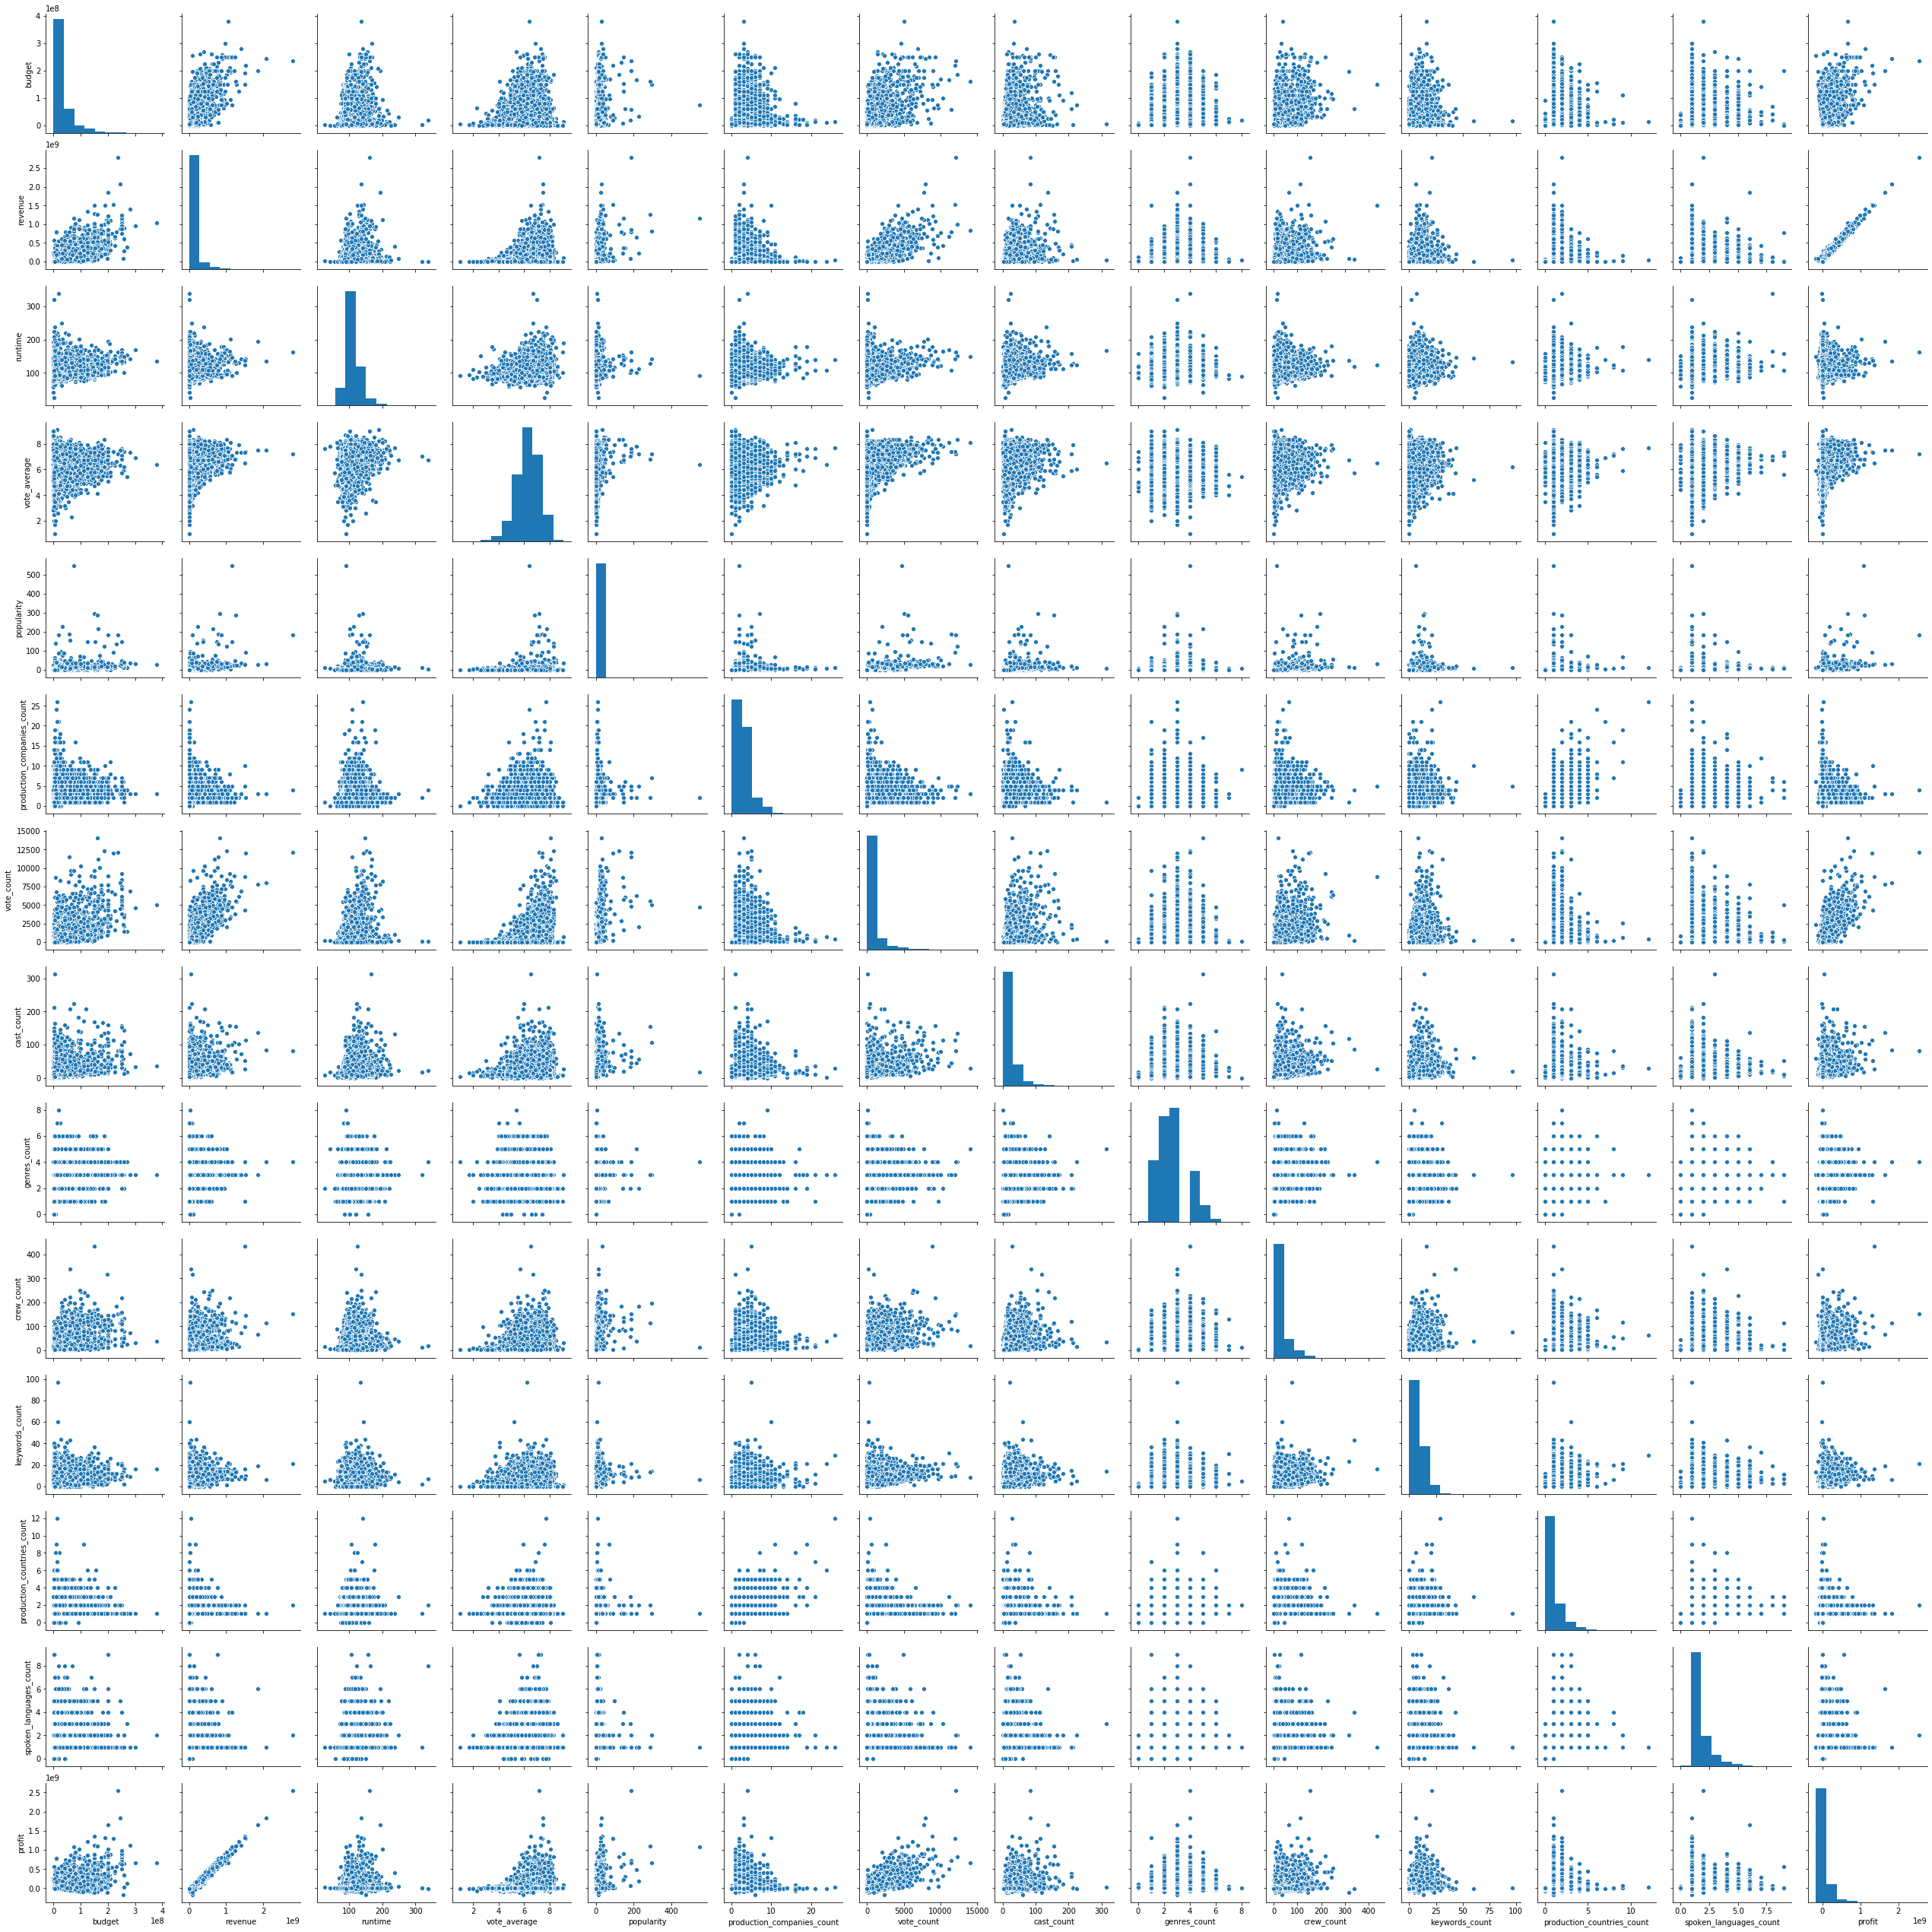

In [521]:
g = seaborn.pairplot(corelac)

In [485]:
from sklearn.preprocessing import MinMaxScaler 
# Нормализуем данные
mms = MinMaxScaler()
mms.fit(corelac)
corelac_transformed = mms.transform(corelac)

In [486]:
import matplotlib.pyplot as plt  

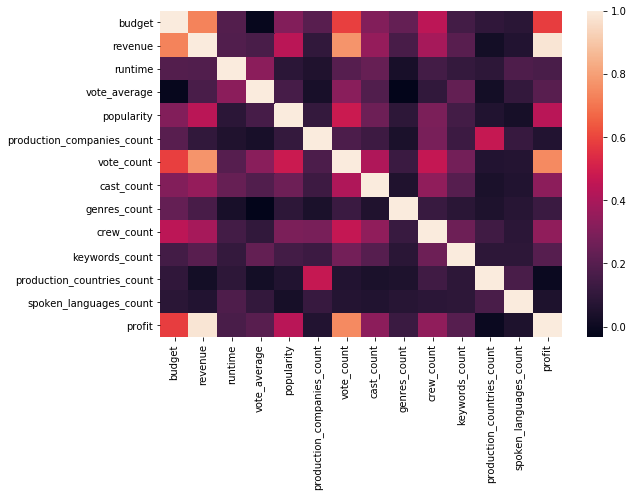

In [487]:
f, ax = plt.subplots(figsize=(9, 6))
corr = corelac.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               ax=ax)
plt.show()

Тут видно что корреляция у почти у всех признаков нулевая, за исключением выручки, бюджета и кассового сбора. ЧТо в принципе и в Power BI видно.

In [298]:
corelac.to_csv('movieMegaInfoSmallData.csv')

**Глубинный анализ**

In [42]:
megaInfo

cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
46623  [{'cast_id': 0, 'character': '', 'credit_id': ...   
46624  [{'cast_id': 1002, 'character': 'Sister Angela...   
46625  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
46626  [{'cast_id': 2, 'character': '', 'credit_id': ...   
46627                                                NaN   

                                                    crew      id  adult  \
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862      0   
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844      0   
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602      0   
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357      0   
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862      0   
...                                                  ...     ...    ...   
46623  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050      0   
46624  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109      0   
46625  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758      0   
46626  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506      0   
46627  [{'credit_id': '593e676c92514105b702e68e', 'de...  461257      0   

           budget                                             genres  \
0      30000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      65000000.0  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2             NaN  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      16000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4             NaN                     [{'id': 35, 'name': 'Comedy'}]   
...           ...                                                ...   
46623         NaN  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
46624         NaN                      [{'id': 18, 'name': 'Drama'}]   
46625         NaN  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
46626         NaN                                                NaN   
46627         NaN                                                NaN   

                    original_title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
46623                      رگ خواب   
46624          Siglo ng Pagluluwal   
46625                     Betrayal   
46626          Satana likuyushchiy   
46627                     Queerama   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
...                                                  ...         ...   
46623        Rising and falling between a man and woman.    0.072051   
46624  An artist struggles to finish his work while a...    0.178241   
46625  When one of her hits goes wrong, a professiona...    0.903007   
46626  In a small town live two brothers, one a minis...    0.003503   
46627  50 years after decriminalisation of homosexual...    0.163015   

                                    production_companies  \
0         [{'name': 'Pixar Animation Studios', 'id': 3}]   
1      [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2      [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  

In [43]:
X = megaInfo.drop(['cast', 'crew', 'id', 'adult', 'budget', 'genres', 'original_title', 'overview', 'popularity', 'production_companies',
                          'production_countries', 'release_date', 'revenue', 'spoken_languages', 'tagline', 'title', 'vote_count',
                  'keywords', 'profit', 'keywords_count'], axis=1)

In [44]:
X = X.fillna(0)
X

runtime  vote_average  cast_count  genres_count  crew_count  \
0         81.0           7.7        13.0           3.0       106.0   
1        104.0           6.9        26.0           3.0        16.0   
2        101.0           6.5         7.0           2.0         4.0   
3        127.0           6.1        10.0           3.0        10.0   
4        106.0           5.7        12.0           1.0         7.0   
...        ...           ...         ...           ...         ...   
46623     90.0           4.0         3.0           2.0         9.0   
46624    360.0           9.0        11.0           1.0         6.0   
46625     90.0           3.8        15.0           3.0         5.0   
46626     87.0           0.0         5.0           0.0         2.0   
46627     75.0           0.0         0.0           0.0         1.0   

       production_companies_count  production_countries_count  \
0                             1.0                         1.0   
1                             3.0                         1.0   
2                             2.0                         1.0   
3                             1.0                         1.0   
4                             2.0                         1.0   
...                           ...                         ...   
46623                         0.0                         1.0   
46624                         1.0                         1.0   
46625                         1.0                         1.0   
46626                         1.0                         1.0   
46627                         0.0                         1.0   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
0                         1.0                1             1             1   
1                         2.0                0             0             1   
2                         1.0                0             1             0   
3                         1.0                0             1             0   
4                         1.0                0             1             0   
...                       ...              ...           ...           ...   
46623                     1.0                0             0             1   
46624                     1.0                0             0             0   
46625                     1.0                0             0             0   
46626                     0.0                0             0             0   
46627                     1.0                0             0             0   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
0                    0              0              0            0   
1                    1              1              0            0   
2                    0              0              1            0   
3                    0              0              1            1   
4                    0              0              0            0   
...                ...            ...            ...          ...   
46623                0              0              0            1   
46624                0              0              0            1   
46625                0              0              0            1   
46626                0              0              0            0   
46627                0              0              0            0   

       gener Action  gener Crime  gener Thriller  gener Horror  gener History  \
0                 0            0               0             0              0   
1                 0            0               0             0              0   
2                 0            0               0             0              0   
3                 0            0               0             0              0   
4                 0            0               0             0              0   
...             ...          ...             ...           ...            ...   
46623             0            0               0    

In [45]:
X.shape

(46628, 188)

In [46]:
from sklearn.preprocessing import MinMaxScaler 
# Нормализуем данные
mms = MinMaxScaler()
mms.fit(X)
X_transformed = mms.transform(X)
X_transformed.shape

(46628, 188)

In [47]:
X_transformed

array([[0.06449045, 0.77      , 0.04153355, ..., 0.        , 0.        ,
        0.        ],
       [0.08280255, 0.69      , 0.08306709, ..., 0.        , 0.        ,
        0.        ],
       [0.08041401, 0.65      , 0.02236422, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07165605, 0.38      , 0.04792332, ..., 0.        , 0.        ,
        0.        ],
       [0.06926752, 0.        , 0.01597444, ..., 0.        , 0.        ,
        0.        ],
       [0.05971338, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from sklearn import manifold
from sklearn.decomposition import PCA, TruncatedSVD

#рисуем штучку, которая сокращает размерность

def plot_TSNE(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True):
        tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
        print(2)
        data_2d_tsne = tsne.fit_transform(data)
        print(1)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], s=8, alpha=.8)
            
def plot_PCA(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True):
        lsa = PCA(n_components=2)
        print(2)
        lsa.fit(data)
        print(1)
        lsa_scores = lsa.transform(data)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8)
            
def plot_LSA(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        print(2)
        lsa.fit(data)
        print(1)
        lsa_scores = lsa.transform(data)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8)

2
1


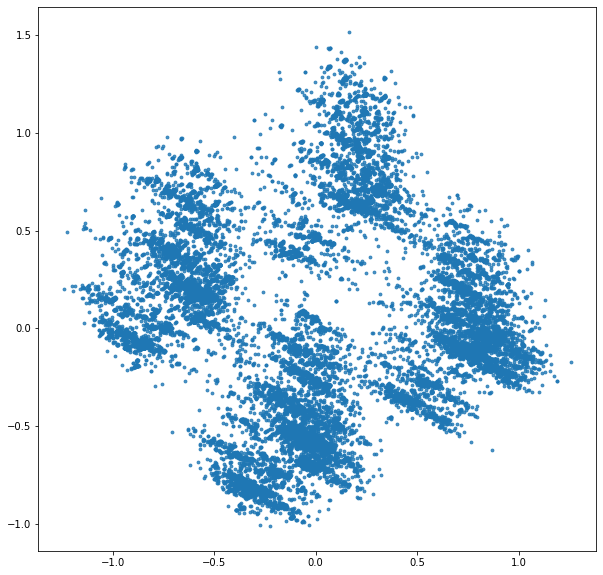

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))          
plot_PCA(X_transformed)
plt.show()

2
1


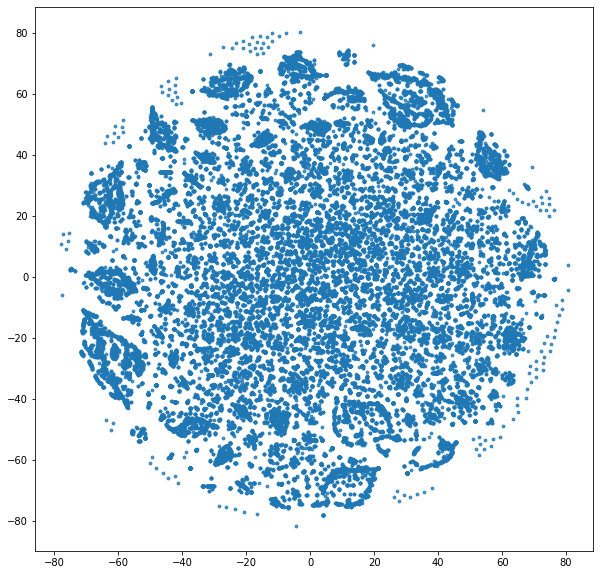

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))          
plot_TSNE(X_transformed)
plt.show()

2
1


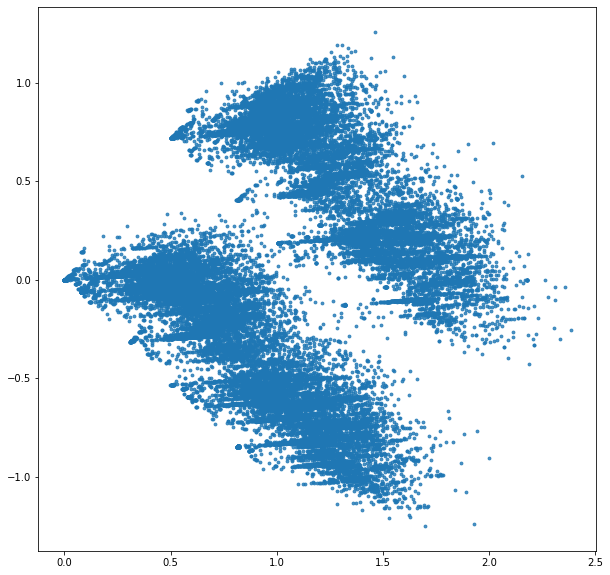

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_transformed)
plt.show()

In [51]:
#training k-means model
from sklearn.cluster import KMeans

sum_of_squared_distances_tr = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    sum_of_squared_distances_tr.append(km.inertia_)

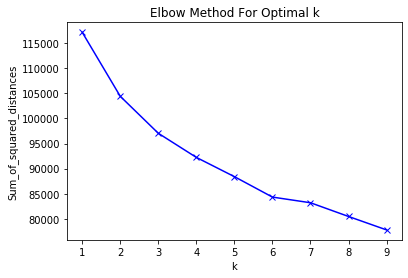

In [53]:
plt.plot(K, sum_of_squared_distances_tr, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Кажется что 2 или 6

2
1


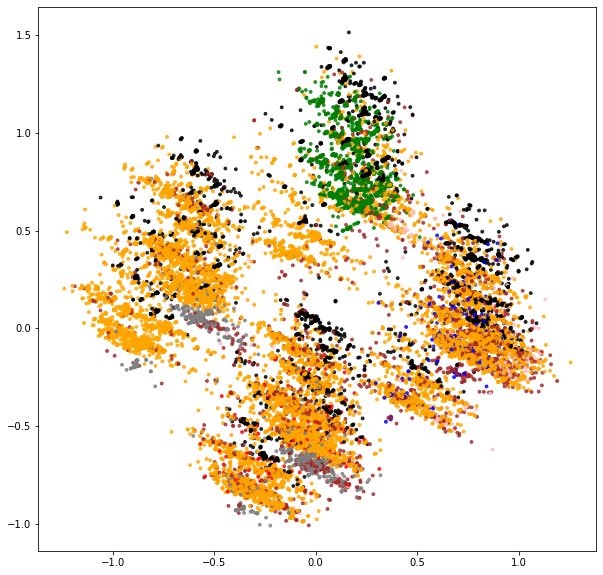

In [114]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8,random_state=57) #56 - если ничего другого не подойдет для 5
gmm.fit(X_transformed)

#predictions from gmm
gmm_labels = gmm.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_PCA(X_transformed, gmm_labels, ['orange','blue', 'green', 'red', 'black', 'pink', 'brown', 'gray'])

2
1


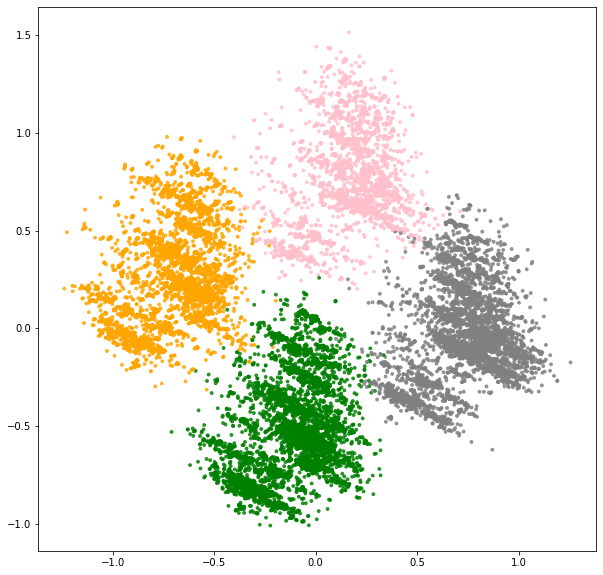

In [97]:
from sklearn.mixture import GaussianMixture
gmm_4 = GaussianMixture(n_components=4,random_state=51) #51 - если ничего другого не подойдет для 4
gmm_4.fit(X_transformed)

#predictions from gmm
gmm_labels_4 = gmm_4.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_PCA(X_transformed, gmm_labels_4, ['orange','green','pink', 'gray'])

2
1


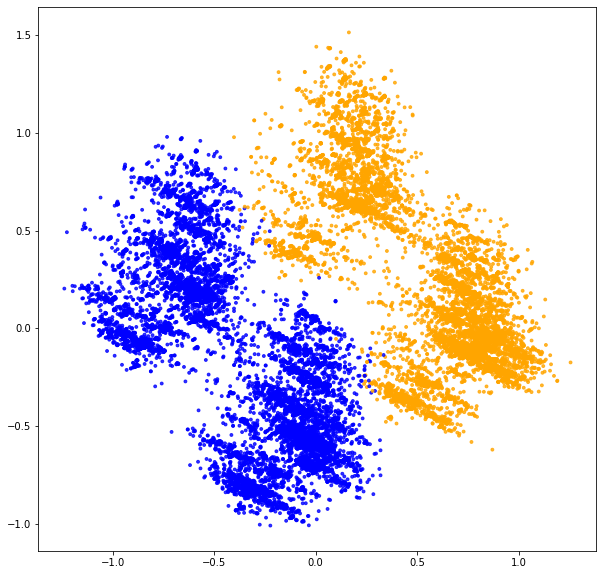

In [105]:
gmm_2 = GaussianMixture(n_components=2,random_state=43) #42
gmm_2.fit(X_transformed)

#predictions from gmm
gmm_labels_2 = gmm_2.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_PCA(X_transformed, gmm_labels_2, ['orange','blue'])

2
1


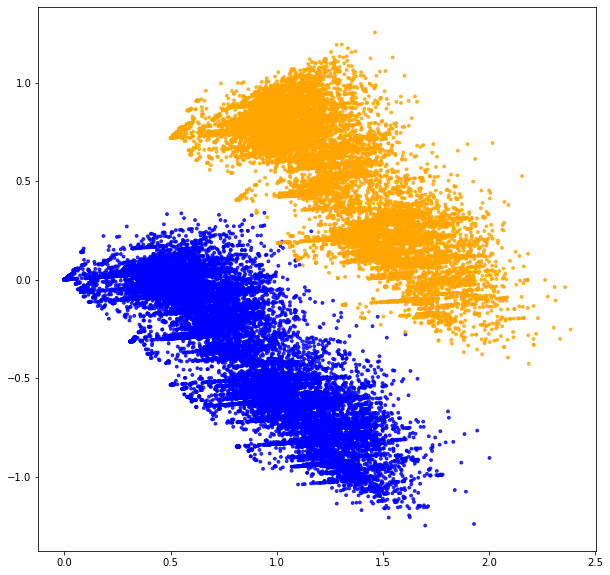

In [99]:
fig = plt.figure(figsize=(10, 10))      
plot_LSA(X_transformed, gmm_labels_2, ['orange','blue'])

In [115]:
set(gmm_labels_4)

{0, 1, 2, 3}

In [118]:
gmm_labels_4.shape, X.shape, type(gmm_labels_4)

((46628,), (46628, 188), numpy.ndarray)

In [135]:
gmm_labels_4

array([0, 0, 0, ..., 2, 1, 1])

In [120]:
X['class'] = gmm_labels_4

In [128]:
X.loc[X['class'] == 0].describe()

runtime  vote_average    cast_count  genres_count    crew_count  \
count  12295.000000  12295.000000  12295.000000  12295.000000  12295.000000   
mean      89.406751      5.444392     14.364701      2.016267     14.151118   
std       31.249164      1.779279     14.293829      1.061120     21.760661   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       82.000000      4.800000      7.000000      1.000000      3.000000   
50%       91.000000      5.800000     11.000000      2.000000      8.000000   
75%      100.000000      6.500000     17.000000      3.000000     15.000000   
max      877.000000     10.000000    313.000000      8.000000    435.000000   

       production_companies_count  production_countries_count  \
count                12295.000000                12295.000000   
mean                     1.688329                    1.206913   
std                      1.460885                    0.597948   
min                      0.000000                    1.000000   
25%                      1.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      2.000000                    1.000000   
max                     16.000000                   15.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count            12295.000000     12295.000000  12295.000000  12295.000000   
mean                 1.195039         0.069134      0.401139      0.102155   
std                  0.635451         0.253692      0.490149      0.302865   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      1.000000      0.000000   
max                  9.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count     12295.000000   12295.000000   12295.000000      12295.0   
mean          0.125580       0.074339       0.111671          0.0   
std           0.331388       0.262333       0.314975          0.0   
min           0.000000       0.000000       0.000000          0.0   
25%           0.000000       0.000000       0.000000          0.0   
50%           0.000000       0.000000       0.000000          0.0   
75%           0.000000       0.000000       0.000000          0.0   
max           1.000000       1.000000       1.000000          0.0   

       gener Action   gener Crime  gener Thriller  gener Horror  \
count  12295.000000  12295.000000    12295.000000  12295.000000   
mean       0.203172      0.081253        0.200244      0.188288   
std        0.402376      0.273234        0.400199      0.390958   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       gener History  gener Science Fiction  gener Mystery     gener War  \
count   12295.000000           12295.000000   12295.000000  12295.000000   
mean        0.010167               0.128914       0.060675      0.013583   
std         0.100320               0.335119       0.238743      0.115756   
min         0.000000               0.000000       0.000000      0.000000   
25%         0.000000               0.000000       0.000000      0.000000   
50%         0.000000               0.000000       0.000000      0.000000   
75%         0.000000               0.000000       0.000000      0.000000   
max         1.000000               1.000000       1.000000      1.000000   

       gener Foreign   gener Music  gener Documentary  gener Western  \
count   12295.000000  12295.

In [130]:
X.loc[X['class'] == 1].describe()

runtime  vote_average    cast_count  genres_count    crew_count  \
count  13524.000000  13524.000000  13524.000000  13524.000000  13524.000000   
mean      83.169476      5.331603      8.576457      1.491792      5.674431   
std       46.679282      2.290944      8.179338      1.095192      8.144509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       76.000000      4.800000      3.000000      1.000000      1.000000   
50%       90.000000      5.900000      7.000000      1.000000      3.000000   
75%      101.000000      6.800000     12.000000      2.000000      7.000000   
max     1140.000000     10.000000    128.000000      7.000000    316.000000   

       production_companies_count  production_countries_count  \
count                13524.000000                13524.000000   
mean                     1.040668                    0.787785   
std                      1.582171                    0.739887   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      1.000000                    1.000000   
75%                      1.000000                    1.000000   
max                     26.000000                    7.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count            13524.000000     13524.000000  13524.000000  13524.000000   
mean                 1.010722         0.067805      0.313443      0.053608   
std                  0.771039         0.251421      0.463910      0.225252   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      1.000000      0.000000   
max                 10.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count     13524.000000   13524.000000   13524.000000      13524.0   
mean          0.071872       0.056122       0.069802          0.0   
std           0.258286       0.230167       0.254822          0.0   
min           0.000000       0.000000       0.000000          0.0   
25%           0.000000       0.000000       0.000000          0.0   
50%           0.000000       0.000000       0.000000          0.0   
75%           0.000000       0.000000       0.000000          0.0   
max           1.000000       1.000000       1.000000          0.0   

       gener Action   gener Crime  gener Thriller  gener Horror  \
count  13524.000000  13524.000000    13524.000000   13524.00000   
mean       0.137681      0.059524        0.135980       0.11816   
std        0.344578      0.236611        0.342781       0.32281   
min        0.000000      0.000000        0.000000       0.00000   
25%        0.000000      0.000000        0.000000       0.00000   
50%        0.000000      0.000000        0.000000       0.00000   
75%        0.000000      0.000000        0.000000       0.00000   
max        1.000000      1.000000        1.000000       1.00000   

       gener History  gener Science Fiction  gener Mystery    gener War  \
count   13524.000000           13524.000000   13524.000000  13524.00000   
mean        0.015010               0.067214       0.043848      0.01294   
std         0.121598               0.250401       0.204764      0.11302   
min         0.000000               0.000000       0.000000      0.00000   
25%         0.000000               0.000000       0.000000      0.00000   
50%         0.000000               0.000000       0.000000      0.00000   
75%         0.000000               0.000000       0.000000      0.00000   
max         1.000000               1.000000       1.000000      1.00000   

       gener Foreign   gener Music  gener Documentary  gener Western  \
count   13524.000000  13524.000000   

In [131]:
X.loc[X['class'] == 2].describe()

runtime  vote_average   cast_count  genres_count   crew_count  \
count  9191.000000    9191.00000  9191.000000   9191.000000  9191.000000   
mean    102.763573       5.79394    16.411816      2.485801    14.200957   
std      30.324673       1.61020    14.843120      1.095043    18.796035   
min       0.000000       0.00000     0.000000      1.000000     0.000000   
25%      90.000000       5.30000     8.000000      2.000000     4.000000   
50%     100.000000       6.10000    13.000000      2.000000     9.000000   
75%     113.000000       6.70000    19.000000      3.000000    16.000000   
max    1256.000000      10.00000   224.000000      8.000000   250.000000   

       production_companies_count  production_countries_count  \
count                 9191.000000                 9191.000000   
mean                     1.901099                    1.250027   
std                      1.593960                    0.697535   
min                      0.000000                    1.000000   
25%                      1.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      3.000000                    1.000000   
max                     26.000000                   12.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count             9191.000000      9191.000000   9191.000000   9191.000000   
mean                 1.256229         0.006637      0.215319      0.054619   
std                  0.699104         0.081201      0.411066      0.227247   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      0.000000      0.000000   
max                  8.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count      9191.000000    9191.000000    9191.000000       9191.0   
mean          0.066152       0.033946       0.244478          1.0   
std           0.248561       0.181101       0.429801          0.0   
min           0.000000       0.000000       0.000000          1.0   
25%           0.000000       0.000000       0.000000          1.0   
50%           0.000000       0.000000       0.000000          1.0   
75%           0.000000       0.000000       0.000000          1.0   
max           1.000000       1.000000       1.000000          1.0   

       gener Action  gener Crime  gener Thriller  gener Horror  gener History  \
count   9191.000000  9191.000000     9191.000000   9191.000000    9191.000000   
mean       0.136111     0.160374        0.213252      0.045370       0.045044   
std        0.342925     0.366973        0.409627      0.208127       0.207412   
min        0.000000     0.000000        0.000000      0.000000       0.000000   
25%        0.000000     0.000000        0.000000      0.000000       0.000000   
50%        0.000000     0.000000        0.000000      0.000000       0.000000   
75%        0.000000     0.000000        0.000000      0.000000       0.000000   
max        1.000000     1.000000        1.000000      1.000000       1.000000   

       gener Science Fiction  gener Mystery    gener War  gener Foreign  \
count            9191.000000    9191.000000  9191.000000    9191.000000   
mean                0.034490       0.075726     0.047547       0.004461   
std                 0.182495       0.264574     0.212816       0.066644   
min                 0.000000       0.000000     0.000000       0.000000   
25%                 0.000000       0.000000     0.000000       0.000000   
50%                 0.000000       0.000000     0.000000       0.000000   
75%                 0.000000       0.000000     0.000000       0.000000   
max                 1.000000       1.000000     1.000000       1.000000   

       ge

In [132]:
X.loc[X['class'] == 3].describe()

runtime  vote_average    cast_count  genres_count    crew_count  \
count  11618.000000  11618.000000  11618.000000  11618.000000  11618.000000   
mean     102.742641      5.970675     11.251592      2.197452      7.929248   
std       38.838948      1.787782      8.731589      1.043145      8.663826   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%       90.000000      5.500000      6.000000      1.000000      2.000000   
50%      100.000000      6.300000      9.000000      2.000000      5.000000   
75%      115.000000      7.000000     14.000000      3.000000     11.000000   
max      931.000000     10.000000    137.000000      8.000000    135.000000   

       production_companies_count  production_countries_count  \
count                11618.000000                11618.000000   
mean                     1.722241                    1.184455   
std                      2.162836                    0.920892   
min                      0.000000                    0.000000   
25%                      0.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      2.000000                    1.000000   
max                     26.000000                   25.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count            11618.000000     11618.000000  11618.000000  11618.000000   
mean                 1.260458         0.014632      0.199432      0.029954   
std                  0.845867         0.120082      0.399591      0.170466   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      0.000000      0.000000   
max                 19.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count     11618.000000   11618.000000   11618.000000      11618.0   
mean          0.039852       0.034429       0.203047          1.0   
std           0.195620       0.182337       0.402285          0.0   
min           0.000000       0.000000       0.000000          1.0   
25%           0.000000       0.000000       0.000000          1.0   
50%           0.000000       0.000000       0.000000          1.0   
75%           0.000000       0.000000       0.000000          1.0   
max           1.000000       1.000000       1.000000          1.0   

       gener Action   gener Crime  gener Thriller  gener Horror  \
count  11618.000000  11618.000000    11618.000000  11618.000000   
mean       0.096316      0.095455        0.131950      0.037184   
std        0.295037      0.293855        0.338451      0.189220   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       gener History  gener Science Fiction  gener Mystery     gener War  \
count    11618.00000           11618.000000   11618.000000  11618.000000   
mean         0.05896               0.028318       0.043553      0.048976   
std          0.23556               0.165887       0.204107      0.215827   
min          0.00000               0.000000       0.000000      0.000000   
25%          0.00000               0.000000       0.000000      0.000000   
50%          0.00000               0.000000       0.000000      0.000000   
75%          0.00000               0.000000       0.000000      0.000000   
max          1.00000               1.000000       1.000000      1.000000   

       gener Foreign   gener Music  gener Documentary  gener Western  \
count   11618.000000  11618.

Классное разбиение по принципу Штаты не Штаты, Драма не Драма 👍🏾. Уберу эти признаки и может будет что-то поинтереснее

**Еще попытка**

In [155]:
X_new = megaInfo.drop(['cast', 'crew', 'id', 'adult', 'genres', 'original_title', 'overview', 'popularity', 'production_companies',
                          'production_countries', 'release_date', 'spoken_languages', 'tagline', 'title',
                  'keywords', 'keywords_count', 'country United States of America', 'gener Drama', 'gener Comedy'], axis=1)

In [156]:
X_new = X_new.fillna(0)

In [157]:
mms = MinMaxScaler()
mms.fit(X_new)
X_new_transformed = mms.transform(X_new)
X_new_transformed.shape

(46628, 189)

2
1


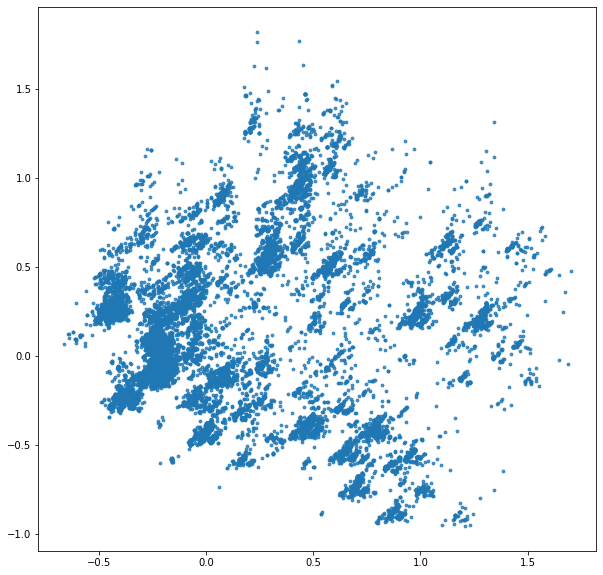

In [158]:
fig = plt.figure(figsize=(10, 10))          
plot_PCA(X_new_transformed)
plt.show()

2
1


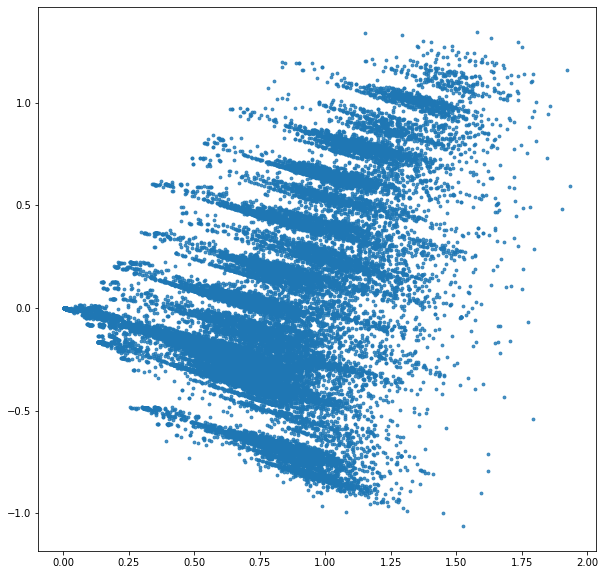

In [159]:
fig = plt.figure(figsize=(10, 10))      
plot_LSA(X_new_transformed)

In [160]:
sum_of_squared_distances_tr = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_new_transformed)
    sum_of_squared_distances_tr.append(km.inertia_)

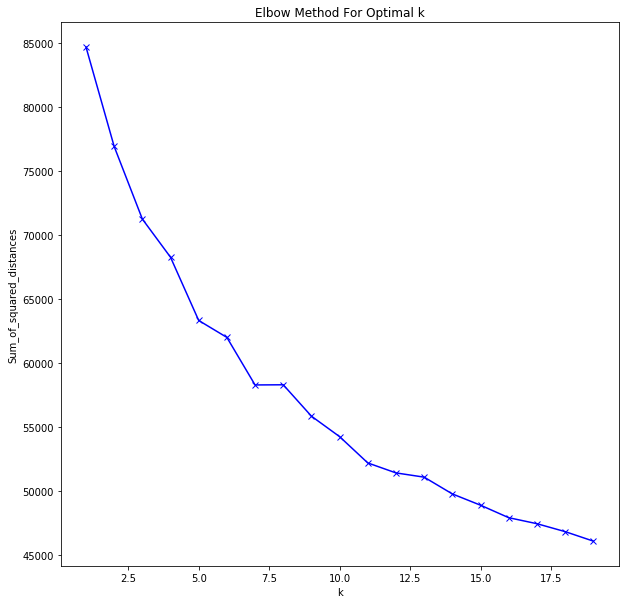

In [161]:
fig = plt.figure(figsize=(10, 10))      
plt.plot(K, sum_of_squared_distances_tr, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

2
1


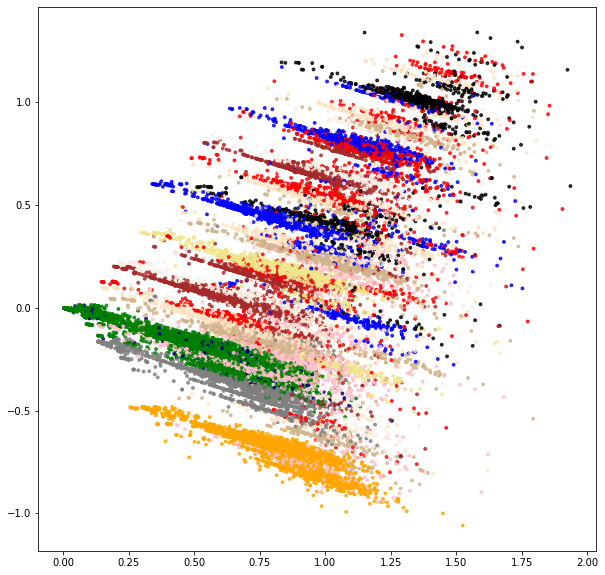

In [171]:
gmm2 = GaussianMixture(n_components=13,random_state=39) #27 - если ничего другого не подойдет для 5
gmm2.fit(X_new_transformed)

#predictions from gmm
gmm2_labels = gmm2.predict(X_new_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_new_transformed, gmm2_labels, ['orange','blue', 'green', 'red', 'black', 'pink', 'brown', 'gray', 'tan', 'khaki', 'navy', 'linen', 'bisque'])

In [152]:
X_new['class_gaus_2'] = gmm2_labels

In [153]:
X_new.loc[X_new['class_gaus_2'] == 0].describe()

budget       revenue       runtime  vote_average    vote_count  \
count  3.316100e+04  3.316100e+04  33161.000000  33161.000000  33161.000000   
mean   4.017238e+06  1.040202e+07     94.704593      5.572371    108.121589   
std    1.773600e+07  6.580860e+07     42.280981      2.024819    517.142897   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.000000      3.000000   
50%    0.000000e+00  0.000000e+00     95.000000      6.000000      8.000000   
75%    0.000000e+00  0.000000e+00    108.000000      6.800000     29.000000   
max    3.800000e+08  2.787965e+09   1256.000000     10.000000  14075.000000   

         cast_count  genres_count    crew_count  production_companies_count  \
count  33161.000000  33161.000000  33161.000000                33161.000000   
mean      11.636923      1.897289     10.421067                    1.547541   
std       11.622065      1.136256     16.466634                    1.822948   
min        0.000000      0.000000      0.000000                    0.000000   
25%        5.000000      1.000000      2.000000                    0.000000   
50%        9.000000      2.000000      6.000000                    1.000000   
75%       15.000000      3.000000     12.000000                    2.000000   
max      208.000000      7.000000    435.000000                   26.000000   

       production_countries_count  spoken_languages_count        profit  \
count                33161.000000            33161.000000  3.316100e+04   
mean                     1.098218                1.169205  6.384783e+06   
std                      0.819344                0.775484  5.323315e+07   
min                      0.000000                0.000000 -1.657101e+08   
25%                      1.000000                1.000000  0.000000e+00   
50%                      1.000000                1.000000  0.000000e+00   
75%                      1.000000                1.000000  0.000000e+00   
max                     15.000000               13.000000  2.550965e+09   

       gener Animation  gener Comedy  gener Family  gener Adventure  \
count     33161.000000       33161.0  33161.000000     33161.000000   
mean          0.043244           0.0      0.049003         0.082537   
std           0.203408           0.0      0.215878         0.275185   
min           0.000000           0.0      0.000000         0.000000   
25%           0.000000           0.0      0.000000         0.000000   
50%           0.000000           0.0      0.000000         0.000000   
75%           0.000000           0.0      0.000000         0.000000   
max           1.000000           0.0      1.000000         1.000000   

       gener Fantasy  gener Romance  gener Action   gener Crime  \
count   33161.000000   33161.000000  33161.000000  33161.000000   
mean        0.049486       0.112361      0.161877      0.105304   
std         0.216883       0.315815      0.368343      0.306950   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000   
75%         0.000000       0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000   

       gener Thriller  gener Horror  gener History  gener Science Fiction  \
count    33161.000000  33161.000000   33161.000000           33161.000000   
mean         0.215162      0.124152       0.040620               0.077621   
std          0.410941      0.329760       0.197411               0.267579   
min          0.000000      0.000000       0.000000               0.000000   
25%          0.000000      0.000000       0.000000               0.000000   
50%          0.000000      0.000000       0.000000               0.000000   
75%          0.000000      0.000000       0.000000               0.000000   
max          1.000000      1.000000       1.000000   

In [154]:
X_new.loc[X_new['class_gaus_2'] == 1].describe()

budget       revenue       runtime  vote_average    vote_count  \
count  1.346700e+04  1.346700e+04  13467.000000  13467.000000  13467.000000   
mean   4.524126e+06  1.256490e+07     90.718423      5.708577    108.260340   
std    1.607581e+07  5.854485e+07     29.152969      1.678306    400.825495   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.200000      4.000000   
50%    0.000000e+00  0.000000e+00     94.000000      6.000000     13.000000   
75%    0.000000e+00  0.000000e+00    104.000000      6.700000     48.000000   
max    2.300000e+08  1.156731e+09    436.000000     10.000000  11444.000000   

         cast_count  genres_count    crew_count  production_companies_count  \
count  13467.000000  13467.000000  13467.000000                13467.000000   
mean      13.980248      2.259301      9.489790                    1.559070   
std       12.791774      1.082328     13.662183                    1.560831   
min        0.000000      1.000000      0.000000                    0.000000   
25%        7.000000      1.000000      3.000000                    1.000000   
50%       11.000000      2.000000      6.000000                    1.000000   
75%       17.000000      3.000000     12.000000                    2.000000   
max      313.000000      8.000000    244.000000                   26.000000   

       production_countries_count  spoken_languages_count        profit  \
count                13467.000000            13467.000000  1.346700e+04   
mean                     1.063711                1.171753  8.040775e+06   
std                      0.644375                0.688307  4.775964e+07   
min                      0.000000                0.000000 -1.040024e+08   
25%                      1.000000                1.000000  0.000000e+00   
50%                      1.000000                1.000000  0.000000e+00   
75%                      1.000000                1.000000  0.000000e+00   
max                     25.000000               19.000000  1.082731e+09   

       gener Animation  gener Comedy  gener Family  gener Adventure  \
count     13467.000000       13467.0  13467.000000     13467.000000   
mean          0.041880           1.0      0.089552         0.063117   
std           0.200323           0.0      0.285550         0.243183   
min           0.000000           1.0      0.000000         0.000000   
25%           0.000000           1.0      0.000000         0.000000   
50%           0.000000           1.0      0.000000         0.000000   
75%           0.000000           1.0      0.000000         0.000000   
max           1.000000           1.0      1.000000         1.000000   

       gener Fantasy  gener Romance  gener Action   gener Crime  \
count   13467.000000   13467.000000  13467.000000  13467.000000   
mean        0.055246       0.237395      0.101136      0.066459   
std         0.228469       0.425502      0.301520      0.249092   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000   
75%         0.000000       0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000   

       gener Thriller  gener Horror  gener History  gener Science Fiction  \
count    13467.000000  13467.000000   13467.000000           13467.000000   
mean         0.048934      0.047895       0.005940               0.042029   
std          0.215739      0.213552       0.076848               0.200662   
min          0.000000      0.000000       0.000000               0.000000   
25%          0.000000      0.000000       0.000000               0.000000   
50%          0.000000      0.000000       0.000000               0.000000   
75%          0.000000      0.000000       0.000000               0.000000   
max          1.000000      1.000000       1.000000   